<a href="https://colab.research.google.com/github/Cepeda-R/PythonTraining/blob/main/TrainingFlask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Faz o seguinte: levanta um serviço web em flask.
* Treina um modelo
* Quando acedes a um endpoint faz um pedido ao modelo
* Quando acedes ao endpoint2 treinas um novo modelo
* Para já deve chegar isto
* Depois se quiseres
* Mete numa BD os dados que vão ser tratados
* E ilustra com tableau ou power bi

In [ ]:
#general
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date
#from pandas import datetime => deprecated

#visual charts
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

#statistics
from scipy.stats import shapiro
import statsmodels.api as sm 
import pylab as py 

#misc
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%config IPCompleter.greedy=True

In [ ]:
!git clone https://github.com/Cepeda-R/DataSets
#para coletar as DBs do GitHub

fatal: destination path 'DataSets' already exists and is not an empty directory.


In [ ]:
BragaData = pd.read_csv('DataSets/CSV_Meteo_BRAGA_RAIN - Folha1.csv')
BragaData.head(5)

,Data,SAMEIRO (04G/02UG),Unnamed: 2,Unnamed: 3
0,NaN,Precipitação diária (mm),Precipitação mensal (mm),Velocidade do vento média diária (m/s)
1,01/11/2009 09:00,(vau) 0.0,(vc) 0.7,0.4
2,02/11/2009 09:00,(vau) 0.1,-,0.7
3,03/11/2009 09:00,(vau) 0.0,-,0.4
4,04/11/2009 09:00,(vau) 0.0,-,1.0



*   Adjust name of columns
*   Remove (vau) & (vc) from rows
*   Create a column for Year & Month
*   Feature engineering apply blanks monthly precipitation



In [ ]:
BragaData = BragaData.rename(columns=BragaData.iloc[0])
BragaData.drop([0], axis=0, inplace=True)
BragaData.rename(columns={ BragaData.columns[0]: "DateMonitoring" }, inplace = True)
#rename columns

In [ ]:
BragaData['Precipitação mensal (mm)'] = BragaData['Precipitação mensal (mm)'].replace('-', np.nan)
BragaData['Precipitação diária (mm)'] = BragaData['Precipitação diária (mm)'].replace('-', np.nan)
BragaData['Velocidade do vento média diária (m/s)'] = BragaData['Velocidade do vento média diária (m/s)'].replace('-', np.nan)
BragaData['Precipitação mensal (mm)'].isnull()
#transform - in Null values to perform fill method

1       False
2        True
3        True
4        True
5        True
        ...  
1791     True
1792     True
1793     True
1794     True
1795     True
Name: Precipitação mensal (mm), Length: 1795, dtype: bool

In [ ]:
BragaData['Precipitação mensal (mm)'] = BragaData['Precipitação mensal (mm)'].fillna(method='ffill')
BragaData['Precipitação diária (mm)'] = BragaData['Precipitação diária (mm)'].fillna(method='ffill')
BragaData['Velocidade do vento média diária (m/s)'] = BragaData['Velocidade do vento média diária (m/s)'].fillna(method='ffill')
#apply fill method in NaN values

In [ ]:
BragaData['Precipitação mensal (mm)'] = BragaData['Precipitação mensal (mm)'].str.split().str[-1]
BragaData['Precipitação diária (mm)'] = BragaData['Precipitação diária (mm)'].str.split().str[-1]
#remove string characters 

In [ ]:
BragaData.dtypes

DateMonitoring                            object
Precipitação diária (mm)                  object
Precipitação mensal (mm)                  object
Velocidade do vento média diária (m/s)    object
dtype: object

In [ ]:
BragaData['Precipitação mensal (mm)'] = pd.to_numeric(BragaData['Precipitação mensal (mm)'])
BragaData['Precipitação diária (mm)'] = pd.to_numeric(BragaData['Precipitação diária (mm)'])
BragaData['Velocidade do vento média diária (m/s)'] = pd.to_numeric(BragaData['Velocidade do vento média diária (m/s)'])
#transform string to float

In [ ]:
BragaData['DateMonitoring']  = pd.to_datetime(BragaData['DateMonitoring'], format='%d/%m/%Y %H:%M')
BragaData['month'] = pd.DatetimeIndex(BragaData['DateMonitoring']).month
BragaData['year'] = pd.DatetimeIndex(BragaData['DateMonitoring']).year
#transform data and retrieve month and year to new columns

In [ ]:
BragaData.rename(columns={ BragaData.columns[2]: "Sum_Monthly_Rain(mm)" }, inplace = True)
BragaData.rename(columns={ BragaData.columns[1]: "Daily_Rain(mm)" }, inplace = True)
BragaData.rename(columns={ BragaData.columns[3]: "Avr_Wind_Speed(ms)" }, inplace = True)
#this method only works with index



1.   Chart Month Average Rain (avr vs. month)
2.   Chart Daily Rain vs. Wind Daily (corr)
1.   Chart Daily Rain vs. Month
2.   BoxPlot Daily Rain vs. Month



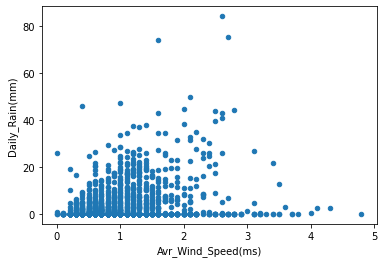

In [ ]:
BragaData.plot(x='Avr_Wind_Speed(ms)', y='Daily_Rain(mm)', kind='scatter')	

need to remove 2011 / 2012 / 2013 from database


They Don't Exist, Python assumes that in a X coordinates

In [ ]:
import numpy as np
import scipy.stats
scipy.stats.pearsonr(BragaData['Daily_Rain(mm)'], BragaData['Avr_Wind_Speed(ms)'])  # Pearson's r
scipy.stats.spearmanr(BragaData['Daily_Rain(mm)'], BragaData['Avr_Wind_Speed(ms)']) # Spearman's rho
scipy.stats.kendalltau(BragaData['Daily_Rain(mm)'], BragaData['Avr_Wind_Speed(ms)']) # Kendall's tau
#there is no correlation whatsoEver

KendalltauResult(correlation=0.09642886681968406, pvalue=5.866674923272917e-08)

Eitherway will continue just to apply flask app

In [ ]:
BragaData.head()

,DateMonitoring,Daily_Rain(mm),Sum_Monthly_Rain(mm),Avr_Wind_Speed(ms),month,year
1,2009-11-01 09:00:00,0.0,0.7,0.4,11,2009
2,2009-11-02 09:00:00,0.1,0.7,0.7,11,2009
3,2009-11-03 09:00:00,0.0,0.7,0.4,11,2009
4,2009-11-04 09:00:00,0.0,0.7,1.0,11,2009
5,2009-11-05 09:00:00,0.0,0.7,1.3,11,2009


In [ ]:
BragaTrain = BragaData.drop(['DateMonitoring', 'year'], axis=1)
#remove data in which i'll not apply in training

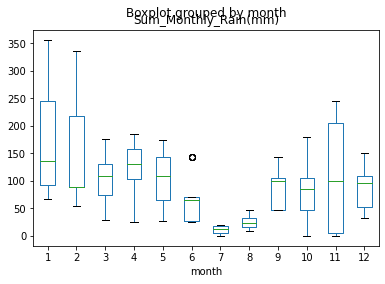

In [ ]:
BragaTrain.boxplot(by ='month', column =['Sum_Monthly_Rain(mm)'], grid = False)

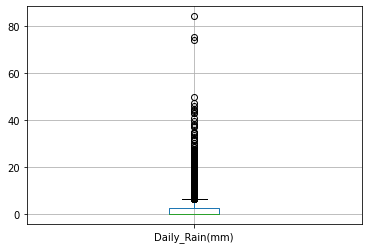

In [ ]:
BragaTrain.boxplot(column =['Daily_Rain(mm)'], grid = True)

In [ ]:
BragaTrain.loc[BragaTrain['Daily_Rain(mm)'] <= 100.0, 'RAIN'] = 2  
BragaTrain.loc[BragaTrain['Daily_Rain(mm)'] <= 20.0, 'RAIN'] = 1
BragaTrain.loc[BragaTrain['Daily_Rain(mm)'] == 0.0, 'RAIN'] = 0 
#feature engineering - feature scaling => Wrongly applied

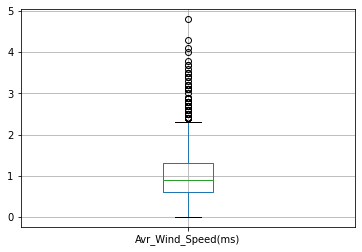

In [ ]:
BragaTrain.boxplot(column =['Avr_Wind_Speed(ms)'], grid = True)

In [ ]:
BragaTrain.loc[BragaTrain['Avr_Wind_Speed(ms)'] <= 5.0, 'WIND'] = 2   
BragaTrain.loc[BragaTrain['Avr_Wind_Speed(ms)'] <= 2.0, 'WIND'] = 1
BragaTrain.loc[BragaTrain['Avr_Wind_Speed(ms)'] == 0.0, 'WIND'] = 0

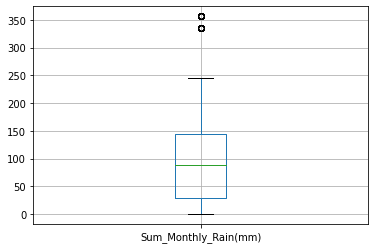

In [ ]:
BragaTrain.boxplot(column =['Sum_Monthly_Rain(mm)'], grid = True)

In [ ]:
BragaTrain.loc[BragaTrain['Sum_Monthly_Rain(mm)'] <= 400.0, 'MONTH_RAIN'] = 2  
BragaTrain.loc[BragaTrain['Sum_Monthly_Rain(mm)'] <= 50.0, 'MONTH_RAIN'] = 1
BragaTrain.loc[BragaTrain['Sum_Monthly_Rain(mm)'] <= 1.0, 'MONTH_RAIN'] = 0

In [ ]:
BragaTrain = BragaTrain.drop("Daily_Rain(mm)", axis=1)
BragaTrain = BragaTrain.drop("Sum_Monthly_Rain(mm)", axis=1)
BragaTrain = BragaTrain.drop("Avr_Wind_Speed(ms)", axis=1)

In [ ]:
BragaTrain

,month,RAIN,WIND,MONTH_RAIN
1,11,0.0,1.0,0.0
2,11,1.0,1.0,0.0
3,11,0.0,1.0,0.0
4,11,0.0,1.0,0.0
5,11,0.0,1.0,0.0
...,...,...,...,...
1791,10,1.0,1.0,2.0
1792,10,0.0,1.0,2.0
1793,10,0.0,1.0,2.0
1794,10,0.0,1.0,2.0


In [ ]:
x_features = BragaTrain.drop("RAIN", axis=1)
y_target = BragaTrain["RAIN"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, 
                                                    test_size=0.4, 
                                                    random_state=1)


In [ ]:
# training the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
pred = knn.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.6016713091922006

In [ ]:
#predict
features = np.array([[1, 0, 1]])
prediction = knn.predict(features)       

Low Score but model to weak and database weak as well 
Reminder: Applying just a Flask Framework is the objective

# FLASK ACTIVITY

In [ ]:
!pip install flask_ngrok
!pip install pyngrok
#install ngrok to create a local host granted by google colab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask, render_template
from flask import request
import requests

In [ ]:
!ngrok authtoken 2I3WIGAPZ1tYeq29DVtlXgEIFhL_3uaFFBc85TiakwiuYGP3A
#authentication ngrok - to garantee the path tunnel

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
def correlation_function(choose_form):
    predictor = np.reshape(choose_form, (1, 3))
    prediction = knn.predict(predictor)
    if prediction[0] == 1:
        is3 = "IT'S RAINING MATE!"
        return is3
    else:
        not3 = "IT'S NOT RAINING - GO OUTSIDE!"
        return not3    

In [ ]:
app = Flask(__name__, template_folder='/content/drive/MyDrive/Templates')
form_data = []
run_with_ngrok(app)  

#@app.route('/', methods=['GET', 'POST'])
#if request.method == "POST" or 'GET': #this can be used everytime there is a communication method
# data = request.form.get("number1") #request.form can be used as well

@app.route('/')
def my_form():
    return render_template('first.html', entry = "LOOK HERE FOR RESULTS")

@app.route('/', methods=['POST'])
def my_form_post():
        form_data.append(float(request.form.get("number1")))
        form_data.append(float(request.form.get("number2")))
        form_data.append(float(request.form.get("number3")))
        return render_template ('first.html', entry = correlation_function(form_data))

#app.debug = True
app.run()


NameError: ignored